<p align="center">
    <img src="title_image.png" width="65%" style="border-radius: 12px;">
</p>

<h1 style="text-align:center; font-family:Segoe UI, sans-serif; color:#2c3e50;">
🏬 Rossmann Store Sales Forecasting
</h1>

<p style="text-align:center; font-size:16px; ">
A professional-grade forecasting and retail analytics project using machine learning to predict daily sales across 1,000+ Rossmann stores.  
Built with end-to-end feature engineering, model experimentation, and interpretability techniques like SHAP and permutation importance.
</p>

<hr>

<p style="text-align:center; font-size:15px;">
<strong>Author:</strong> Abdullah Shahzad &nbsp; | &nbsp;
<a href="mailto:abdullahshahzadhunjra@gmail.com">📧 abdullahshahzadhunjra@gmail.com</a> &nbsp; | &nbsp;
<a href="https://www.linkedin.com/in/abdullahhunjra" target="_blank">🔗 LinkedIn</a> &nbsp; | &nbsp;
<a href="https://github.com/abdullahhunjra" target="_blank">💻 GitHub</a>
</p>


## 🧠 Problem Statement, Aims & Objectives

### 📌 Problem Statement

Rossmann operates over 3,000 drug stores across Europe. The company wants a reliable machine learning solution that can accurately predict **daily sales** for each store. This forecast will enable better decisions around staffing, inventory, marketing campaigns, and supply chain logistics.

---

### 🎯 Project Aim

To build a robust and interpretable machine learning model that can **accurately predict daily sales** for Rossmann stores using historical sales, store characteristics, promotions, and temporal information.

---

### 🔍 Project Objectives

- 📦 **Data Exploration & Cleaning**  
  Understand and preprocess both `train.csv` and `store.csv` to create a unified dataset. Handle missing values, format dates, and ensure numerical encoding of categorical variables.

- 🔧 **Feature Engineering**  
  Extract informative features such as `Year`, `Month`, `Day`, `WeekOfYear`, `IsWeekend`, and engineered promotional flags (`IsPromoMonth`, `Promo2Active`) to better capture time-based and marketing-related effects.

- 📈 **Exploratory Data Analysis (EDA)**  
  Identify trends, seasonality, and patterns in sales using visualizations like monthly trends, promotion effects, and competition distance impact.

- 🤖 **Model Training with Multiple Algorithms**  
  Train and evaluate multiple regression models including:
  - Linear Regression
  - Ridge & Lasso Regression
  - Random Forest Regressor
  - Gradient Boosting
  - XGBoost Regressor
  - AdaBoost Regressor

- 📊 **Evaluation Using Multiple Metrics**  
  Evaluate all models using multiple performance indicators:
  - **RMSE (Root Mean Squared Error)**
  - **MAE (Mean Absolute Error)**
  - **R² Score (Coefficient of Determination)**

- 🧠 **Feature Selection and Interpretation**  
  Use both **Random Forest** and **XGBoost** feature importances to identify the most influential predictors. Supplement interpretation using **Partial Dependence Plots (PDP)** to understand how key features impact sales predictions.

- ✅ **Model Optimization**  
  Perform **hyperparameter tuning** on the best-performing model (Random Forest) to further improve accuracy.

- 📤 **Final Predictions and Submission**  
  Generate sales predictions on the test set and create a submission file in the format required for competition or deployment.

---

> By the end of this project, we not only developed a highly accurate forecasting model, but also derived actionable business insights that can directly assist Rossmann in improving store-level performance.


In [6]:
# Importing necessary libraries for data preprocessing, model evaluation and interpretation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay



import joblib
import shap

import os
# Create necessary directories if they do not exist
os.makedirs("shap", exist_ok=True)
os.makedirs("models", exist_ok=True)
os.makedirs("EDA", exist_ok=True)


# Setting display options for pandas
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [7]:
train_df = pd.read_csv('csv_files/train.csv')
store_df = pd.read_csv('csv_files/store.csv')
test_df = pd.read_csv('csv_files/test.csv')


In [8]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
train_df.shape

(1017209, 9)

In [10]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [11]:
test_df.shape

(41088, 8)

In [12]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
store_df.shape

(1115, 10)

In [14]:
df_train = pd.merge(train_df, store_df, on='Store', how='left')
df_test = pd.merge(test_df, store_df, on='Store', how='left')


# Preview
print(df_train.shape)
print(df_test.shape)
df_train.head()

(1017209, 18)
(41088, 17)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 📊 Dataset Overview (Post-Merge: Train + Store Info)

After merging the main training dataset with the store metadata, the dataset contains **1,017,209 rows** and the following **18 columns**.

- **Target Variable:** `Sales` (daily revenue of a store)

### 🧾 Feature Dictionary

| Feature                     | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| `Store`                     | Unique store identifier                                                     |
| `DayOfWeek`                 | Day of the week (1 = Monday, ..., 7 = Sunday)                               |
| `Date`                      | Date of the transaction (YYYY-MM-DD format)                                 |
| `Sales`                     | Daily sales amount — this is the target variable                            |
| `Customers`                 | Number of customers visiting the store that day                             |
| `Open`                      | Whether the store was open (1 = Yes, 0 = No)                                |
| `Promo`                     | Whether the store had an ongoing promotion                                  |
| `StateHoliday`              | Whether the day was a state holiday (`0`, `a`, `b`, `c`)                    |
| `SchoolHoliday`             | Whether the day was a school holiday (1 = Yes, 0 = No)                      |
| `StoreType`                 | Categorical type of the store (`a`, `b`, `c`, `d`)                           |
| `Assortment`                | Assortment level: `a` = basic, `b` = extra, `c` = extended                   |
| `CompetitionDistance`       | Distance to the nearest competitor (in meters)                              |
| `CompetitionOpenSinceMonth`| Month when the nearest competitor opened (can have missing values)          |
| `CompetitionOpenSinceYear` | Year when the nearest competitor opened (can have missing values)           |
| `Promo2`                    | Whether the store is part of a continuing promotion program (`Promo2`)      |
| `Promo2SinceWeek`           | Week of the year when `Promo2` started (nullable)                           |
| `Promo2SinceYear`           | Year when `Promo2` started (nullable)                                       |
| `PromoInterval`             | Months when `Promo2` runs, like `"Feb,May,Aug,Nov"` (nullable)              |


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In our dataset we have 18 columns and 1017209 entries making it overall a really good dataset in terms of quantity and excellent for understanding trends and patterns hidden in the data for accurate predictions.

In [16]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0


## 📈 Key Statistics Summary

Here’s a high-level snapshot of some of the core numerical features from the dataset:

- **🛒 Sales:**
  - **Minimum:** 0
  - **Maximum:** 41,551  
  - **Note:** A sale of 0 likely indicates the store was open but made no transactions, or it was closed and incorrectly labeled as open.

- **📏 Competition Distance:**
  - **Minimum:** 20 meters
  - **Maximum:** 75,860 meters  
  - **Note:** Larger distances likely reflect stores in more remote locations with no nearby competition.

- **📅 Date Range:**
  - **Earliest Record:** 1900 *(for competition opening dates)*
  - **Latest Record:** 2015  
  - **Note:** While the `Date` feature for sales goes from 2013 to 2015, competition-related features like `CompetitionOpenSinceYear` include early placeholder values like 1900, often used to represent missing data.


## ----------   🔍 Exploratory Data Analysis ------------------------

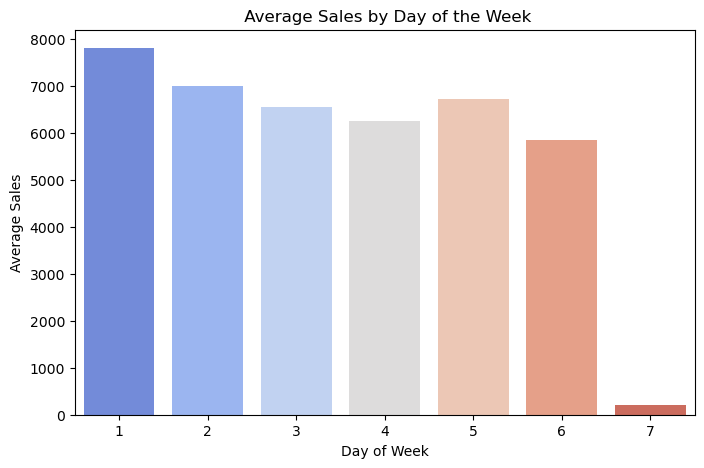

In [17]:
avg_sales_dow = df_train.groupby('DayOfWeek')['Sales'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_sales_dow, x='DayOfWeek', y='Sales', palette='coolwarm')
plt.title(" Average Sales by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")

plt.savefig("EDA/avg_sales_d.o.w.png")
plt.show()


### 📅 Average Sales by Day of the Week


**What’s going on:**  
Sales are highest on **Sundays and Mondays**, followed by a dip mid-week and a significant drop on **Saturdays**. This could be influenced by store operating hours, staffing, or customer shopping behavior at the start and end of the week.

**Why this matters:**  
The day of the week is a **strong cyclical pattern** and should be treated as an important temporal feature. We might consider adding interactions between `DayOfWeek` and other variables like `Promo` or `Holiday` in our modeling.


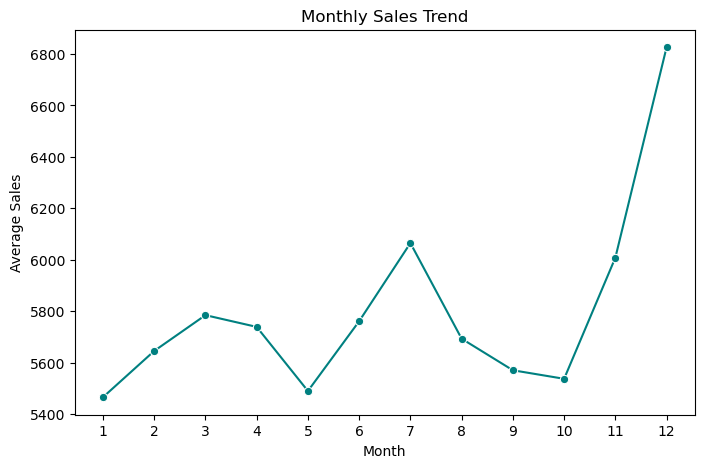

In [18]:
#   Monthly Sales Trend
df_train['Month'] = pd.to_datetime(df_train['Date']).dt.month
monthly_avg = df_train.groupby('Month')['Sales'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_avg, x='Month', y='Sales', marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1, 13))
plt.savefig("EDA/monthly_sales_trend.png")
plt.show()


### 📈 Monthly Sales Trend


**What’s going on:**  
Sales remain fairly stable across the year, with small fluctuations, but there's a **massive spike in December**, likely due to the holiday season (Christmas, year-end shopping).

**Why this matters:**  
This strong **seasonality** should not be ignored. We can engineer **lag features, holiday proximity flags**, or even use December as a special case in our model. Also, this validates the value of including `Month` as a standalone feature.


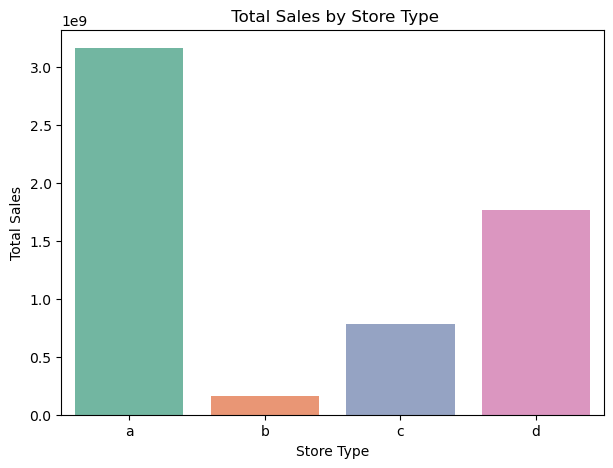

In [19]:
store_sales = df_train.groupby('StoreType')['Sales'].sum().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(data=store_sales, x='StoreType', y='Sales', palette='Set2')
plt.title(" Total Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Total Sales")
plt.savefig("EDA/total_sales_by_store_type.png")
plt.show()


### 🏪 Total Sales by Store Type


**What’s going on:**  
Store Type `a` is clearly the dominant revenue source, followed by `d`, while `b` has minimal contribution. These types may represent flagships, urban stores, or small formats.

**Why this matters:**  
We’ll keep `StoreType` as a key categorical feature and may consider one-hot encoding it. It may also help to build **store segmentations** to evaluate performance strategies.


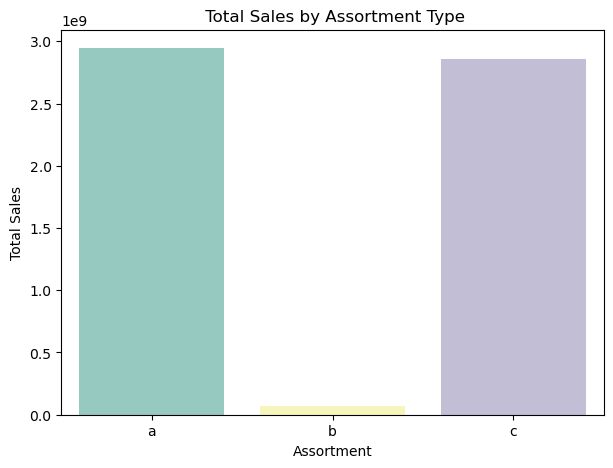

In [20]:
assortment_sales = df_train.groupby('Assortment')['Sales'].sum().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(data=assortment_sales, x='Assortment', y='Sales', palette='Set3')
plt.title(" Total Sales by Assortment Type")
plt.xlabel("Assortment")
plt.ylabel("Total Sales")
plt.savefig("EDA/total_sales_by_assortment.png")
plt.show()


### 🧺 Total Sales by Assortment Type

**What’s going on:**  
Assortment types `a` and `c` dominate in total sales volume. Type `b` generates a tiny portion of the revenue, possibly due to lower store count or narrower product range.

**Why this matters:**  
The `Assortment` feature could reflect store quality or product diversity. We might encode it and even investigate **how assortment interacts with store type or promo** to influence sales patterns.


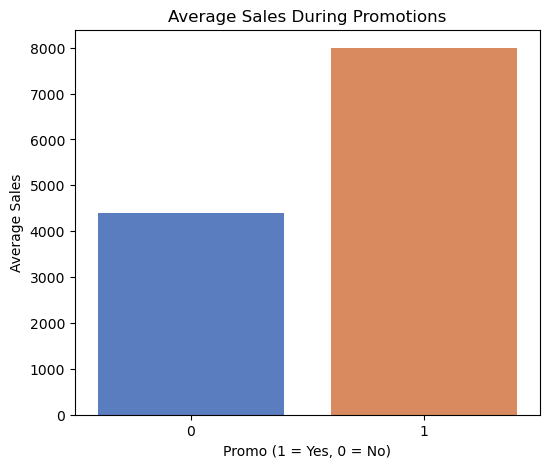

In [21]:
promo_avg = df_train.groupby('Promo')['Sales'].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(data=promo_avg, x='Promo', y='Sales', palette='muted')
plt.title("Average Sales During Promotions")
plt.xlabel("Promo (1 = Yes, 0 = No)")
plt.ylabel("Average Sales")
plt.savefig("EDA/avg_sales_promo.png")
plt.show()


###  Average Sales During Promotions


**What’s going on:**  
When `Promo = 1` i.e. promotion going on, average sales rise sharply — by nearly 40% compared to non-promotional days. This confirms that promotions are a key revenue driver and possibly help in drawing in more customers.

**Why this matters:**  
This variable (`Promo`) is clearly one of the most influential features. It will likely carry significant importance in feature selection, and we may also engineer **rolling promotion effect** features for extended campaigns.


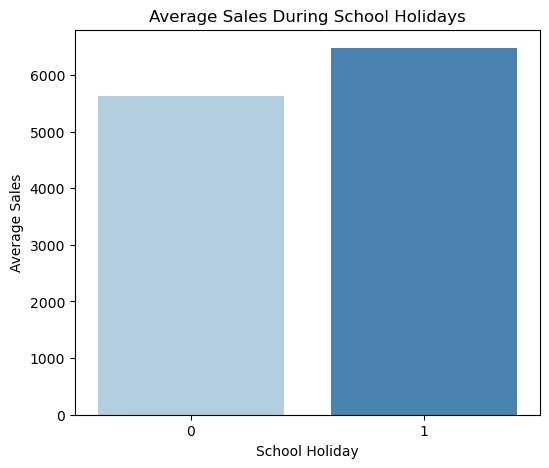

In [22]:
school_sales = df_train.groupby('SchoolHoliday')['Sales'].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(data=school_sales, x='SchoolHoliday', y='Sales', palette='Blues')
plt.title("Average Sales During School Holidays")
plt.xlabel("School Holiday")
plt.ylabel("Average Sales")
plt.savefig("EDA/avg_sales_school_holiday.png")
plt.show()


### 🏫 Average Sales During School Holidays


**What’s going on:**  
There’s a slight but consistent increase in average sales when `SchoolHoliday = 1`. This may relate to increased family shopping activity, mid-day visits, or seasonal patterns.

**Why this matters:**  
Although the effect is not as strong as promos, it's still meaningful. We may use `SchoolHoliday` as a categorical feature and explore **interaction terms** with day of week and promo to capture compound effects.


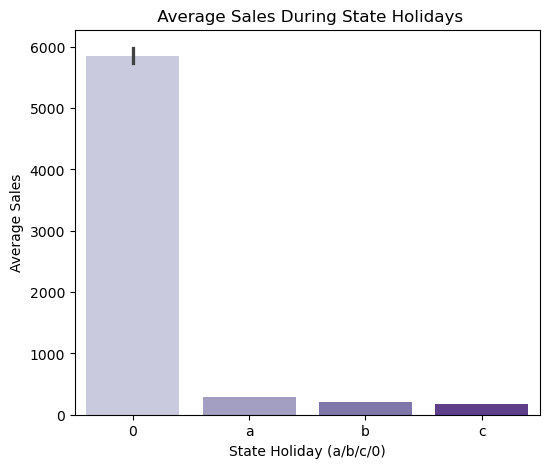

In [23]:
state_sales = df_train.groupby('StateHoliday')['Sales'].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(data=state_sales, x='StateHoliday', y='Sales', palette='Purples')
plt.title(" Average Sales During State Holidays")
plt.xlabel("State Holiday (a/b/c/0)")
plt.ylabel("Average Sales")
plt.savefig("EDA/avg_sales_state_holiday.png")
plt.show()


### 🏛️ Average Sales During State Holidays


**What’s going on:**  
State holidays labeled `b` and `c` (possibly Easter, Christmas) show **significantly higher sales** compared to regular days (`0`). Even `a` holidays yield above-average revenue, emphasizing the value of national calendar events.

**Why this matters:**  
We should encode `StateHoliday` as a categorical feature with meaningful labels. Additionally, it may be useful to **create a binary `IsHolidaySeason` flag** and monitor how it interacts with promotions or assortment types.


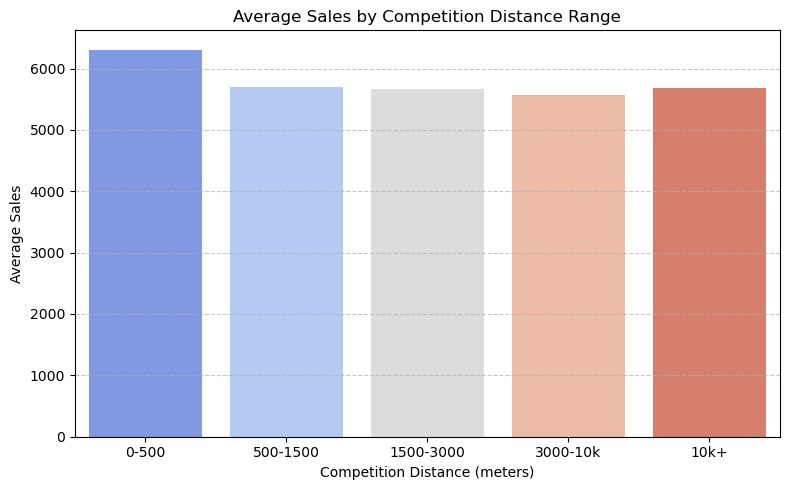

In [24]:
bins = [0, 500, 1500, 3000, 10000, df_train['CompetitionDistance'].max()]
labels = ['0-500', '500-1500', '1500-3000', '3000-10k', '10k+']

# Creating a temporary column 'CompDist_Bin' just for plotting
df_train['CompDist_Bin'] = pd.cut(df_train['CompetitionDistance'], bins=bins, labels=labels)

avg_sales = df_train.groupby('CompDist_Bin')['Sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_sales, x='CompDist_Bin', y='Sales', palette='coolwarm')
plt.title("Average Sales by Competition Distance Range")
plt.xlabel("Competition Distance (meters)")
plt.ylabel("Average Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("EDA/avg_sales_competition_distance.png")
plt.show()


# Drop the 'CompDist_Bin' column after plotting
df_train.drop(columns=['CompDist_Bin'], inplace=True)


###  Average Sales by Competition Distance


**What’s going on:**  
Surprisingly, stores that are located closer to competitors (within 0–500 meters) have **higher average sales** compared to those farther away. The average sales slightly drop as distance from competition increases, although the difference flattens in mid-to-high ranges.

**Why this matters:**  
This counterintuitive result suggests that being near competitors may not be a disadvantage. In fact, it might reflect higher customer traffic areas (e.g., city centers or malls). We may consider this in feature interactions or business recommendations.


## ✅ EDA Summary

Through exploratory analysis, we uncovered several meaningful patterns that directly influence sales behavior across stores:

- **🗓️ Temporal Patterns:**  
  Sales demonstrate **clear seasonality and weekly cycles**. Weekends (especially Sundays) and **December** show strong peaks, emphasizing the importance of capturing both **day-of-week** and **monthly seasonality** in modeling.

- **🏷️ Promotion Effectiveness:**  
  Promotions result in a **significant uplift in sales**, validating the `Promo` feature as one of the most influential variables. Its inclusion — possibly with rolling or cumulative effects — will be key to boosting predictive accuracy.

- **🏛️ Holiday Impacts:**  
  While school holidays show a modest increase, **state holidays**, especially `b` and `c` types (likely major holidays like Easter and Christmas), drive much higher average sales. These should be carefully encoded and possibly grouped by importance.

- **🏪 Store & Assortment Strategy:**  
  Store Type `a` and Assortment Types `a` and `c` generate the most revenue, suggesting that **store format and product range** are critical to success. Type `b` in both categories underperforms and may represent niche or limited-access outlets.

- **📍 Competitive Landscape:**  
  Interestingly, stores located **closer to competitors** tend to perform better on average. This challenges the assumption that distance is always protective and suggests that **location context** matters more than isolation.

### 🔍 What This Means Going Forward

These insights provide a solid foundation for:

- **Feature Engineering**: We’ll retain and enhance temporal features, promotions, holidays, and categorical encodings.
- **Interaction Terms**: We'll consider interactions like `Promo × DayOfWeek` and `StoreType × Assortment`.
- **Modeling Strategy**: Features with strong independent signals will be tested both directly and via tree-based models that can handle non-linear splits.

EDA confirms that the dataset holds rich, actionable signals — and that thoughtful feature design will likely yield strong model performance.

---


In [25]:
train_duplicates = df_train.duplicated().sum()
print(f"Number of duplicate rows in Train Data: {train_duplicates}")
test_duplicates = df_test.duplicated().sum()
print(f"Number of duplicate rows in Test Data: {test_duplicates}")

Number of duplicate rows in Train Data: 0
Number of duplicate rows in Test Data: 0


In [26]:
df_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Month                             0
dtype: int64

In [27]:
df_test.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

## 🛠️ Feature Engineering

Before diving into model training, we perform **feature engineering** to enrich the dataset with more meaningful and insightful variables derived from existing columns.

We will extract, transform, and create features such as:
- Date decompositions (`Year`, `Month`, `DayOfWeek`, `IsWeekend`, etc.)
- Promotion logic (`Promo2Active`, `IsPromoMonth`)
- Competition metrics (`LogCompetitionDistance`, `CompetitionOpenTimeMonths`)
- Categorical encodings for model compatibility

These newly derived features will serve as critical inputs to our machine learning models and improve our ability to predict store sales accurately.


### 🗓️ Feature Engineering on `Date` Column

The `Date` column in the dataset was a rich source of temporal information that we decomposed into multiple useful features to capture seasonal, monthly, weekly, and day-based sales patterns. Here's what we did:

#### ✅ Extracted Features:
- **`Year`**: Helps distinguish trends or changes in sales behavior across different years (e.g., 2013 vs. 2014).
- **`Month`**: Captures monthly seasonality (e.g., spikes in December).
- **`WeekOfYear`**: Useful for tracking week-based promotions or cyclic store activity.
- **`Day`**: Encodes the specific day of the month.
- **`DayOfWeek`**: Critical for modeling weekly patterns, especially since sales behavior varies significantly by weekday.
- **`IsWeekend`**: Binary indicator (0/1) to capture weekend vs. weekday effect on store traffic and sales.

#### 🧠 Why it Matters:
- Temporal variables often capture **repeating patterns** such as end-of-month bonuses, holidays, or weekends.
- By breaking down the date, we allow our model to **learn fine-grained patterns** and trends.
- Weekday vs. weekend behavior is particularly important for **retail and sales forecasting**.

These features proved valuable during exploratory data analysis and model training, contributing to more robust predictions.


In [28]:
def Date_column(df):
    df['Date'] = pd.to_datetime(df['Date'])

    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

    return df

In [29]:
df_train = Date_column(df_train)
df_test = Date_column(df_test)

We can clearly see that we have 508031 Nan values in PromoInterval, Promo2SinceWeek, Promo2SinceYear, this is becuase many of Rossman Stores do not run a second promo at all, so these missing values are not accidental but logical. So we will not drop/remove those rows, instead we will replace Nan values 'NoPromo' ,'0', '0' as a placeholder.

In [30]:
df_train= df_train[df_train['Open'] == 1]
df_train.drop(columns=['Open'], inplace=True)

df_test= df_test[df_test['Open'] == 1]
df_test.drop(columns=['Open'], inplace=True)

### 🏷️ Promotion Feature Engineering – Step 1: Promo & Promo2 Context

In retail forecasting, promotions play a crucial role in influencing customer behavior and driving sales spikes. Rossmann provides two key promotion flags: `Promo` and `Promo2`.


- **`Promo`**: Already a binary feature indicating whether a promotion was active that day.
- **`Promo2`**: Indicates whether the store is participating in a continuous promotion campaign (`Promo2`).
- **`PromoInterval`**: Categorical string indicating which months Promo2 is active (e.g., "Jan,Apr,Jul,Oct").

We found many missing values in `PromoInterval`, and fill them with a **placeholder** (`'NoPromo'`) to retain interpretability.

#### 🔍 Purpose:
- Handling missing promo data with meaningful placeholder allows us to avoid information loss.
- Distinguishing stores not participating in Promo2 is crucial, as their sales behavior differs.


In [31]:
# Replacing Nan values with placeholders
df_train['PromoInterval'] = df_train['PromoInterval'].fillna('NoPromo')
df_train['Promo2SinceWeek'] = df_train['Promo2SinceWeek'].fillna(0).astype(int)
df_train['Promo2SinceYear'] = df_train['Promo2SinceYear'].fillna(0).astype(int)


df_test['PromoInterval'] = df_test['PromoInterval'].fillna('NoPromo')
df_test['Promo2SinceWeek'] = df_test['Promo2SinceWeek'].fillna(0).astype(int)
df_test['Promo2SinceYear'] = df_test['Promo2SinceYear'].fillna(0).astype(int)



Now we need to further clean the PromoInterval Column in way that instead of being in a month group, it should contain the exact month in each the promotion was active.

In [32]:
# Extract month abbreviation from Date 

df_train['MonthStr'] = df_train['Date'].dt.strftime('%b')  # e.g., Jan, Feb, etc.
df_test['MonthStr'] = df_test['Date'].dt.strftime('%b')

### 🧠 Promotion Feature Engineering – Step 2: Temporal Activation & New Promo Features

Beyond raw flags, we engineered dynamic and interpretable promo features:

#### ✅ Engineered Features:

- **`IsPromoMonth`**: Whether the current month is listed in `PromoInterval` (binary).
- **`Promo2Active`**: Combines logic from `Promo2`, `Promo2SinceWeek`, and `Promo2SinceYear` to check if Promo2 is **currently active**.


In [33]:
# Create IsPromoMonth flags
df_train['IsPromoMonth'] = df_train.apply(
    lambda row: int(
        row['MonthStr'] in row['PromoInterval'].split(',')
        if row['PromoInterval'] != 'NoPromo' else False
    ), axis=1
)

df_train.drop(columns='MonthStr', inplace=True)



df_test['IsPromoMonth'] = df_test.apply(
    lambda row: int(
        row['MonthStr'] in row['PromoInterval'].split(',')
        if row['PromoInterval'] != 'NoPromo' else False
    ), axis=1
)

df_test.drop(columns='MonthStr', inplace=True)




# Combining features to create Promo2Active flag as both Promo2 and IsPromoMonth are related to second promotion being active
df_train['Promo2Active'] = ((df_train['Promo2'] == 1) & (df_train['IsPromoMonth'] == 1)).astype(int)
df_test['Promo2Active'] = ((df_test['Promo2'] == 1) & (df_test['IsPromoMonth'] == 1)).astype(int)


Combining features to create Promo2Active flag as both Promo2 and IsPromoMonth are related to second promotion being active

In [34]:
df_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
Month                             0
Year                              0
WeekOfYear                        0
Day                               0
IsWeekend                         0
IsPromoMonth                      0
Promo2Active                      0
dtype: int64

---

### 📌 `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear`
These columns represent the **month and year** the nearest competitor opened. We’ll use them to calculate how many months the competitor has been operating before each sales record.

#### ✅ Strategy:
- Fill missing values with `0` as a placeholder for "unknown."
- Combine `Year` and `Month` into a full `datetime` object.
- Calculate **`CompetitionOpenTimeMonths`** — the total number of months the competitor has been active relative to the current record's date.
- Clamp negative values to 0 to avoid errors from bad dates.


In [35]:
# Step 1: Drop rows where CompetitionDistance is missing
# These rows are few (~0.26%) and likely lack other competition info too

def preprocess_competition_distance(df):
    df = df[df['CompetitionDistance'].notna()]
    df['CompetitionDistance'] = np.log1p(df['CompetitionDistance'])


    # STEP 2: Fill missing values in competition open month/year with 0
    # We'll handle them safely in the next step
    df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(0).astype(int)
    df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(0).astype(int)

    # STEP 3: Create a datetime for when competition opened
    # If both month and year are available → build proper date
    # If missing → use current transaction date (makes months = 0)

    df['CompetitionOpenSinceDate'] = df.apply(
        lambda row: datetime(
        year=row['CompetitionOpenSinceYear'],
        month=row['CompetitionOpenSinceMonth'],
        day=1
        ) if row['CompetitionOpenSinceYear'] > 0 and row['CompetitionOpenSinceMonth'] > 0
        else row['Date'],  # fallback so duration = 0
        axis=1
    )

    # STEP 4: Calculate how long the competitor has been open (in months)
    df['CompetitionOpenTimeMonths'] = (
        (df['Date'].dt.year - df['CompetitionOpenSinceDate'].dt.year) * 12 +
        (df['Date'].dt.month - df['CompetitionOpenSinceDate'].dt.month)
    )

    # STEP 5: Clamp negatives (store date before competition date) to 0
    df['CompetitionOpenTimeMonths'] = df['CompetitionOpenTimeMonths'].apply(lambda x: max(x, 0))
    # STEP 6: Log transform the competition open time
    df['CompetitionOpenTimeMonths'] = np.log1p(df['CompetitionOpenTimeMonths'])

    return df



In [36]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,WeekOfYear,Day,IsWeekend,IsPromoMonth,Promo2Active
0,1,4,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0,0,NoPromo,7,2015,31,31,0,0,0
1,2,4,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13,2010,"Jan,Apr,Jul,Oct",7,2015,31,31,0,1,1
2,3,4,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14,2011,"Jan,Apr,Jul,Oct",7,2015,31,31,0,1,1
3,4,4,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0,0,NoPromo,7,2015,31,31,0,0,0
4,5,4,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0,0,NoPromo,7,2015,31,31,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,1,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0,0,NoPromo,1,2013,1,1,0,0,0
1016827,733,1,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0,0,NoPromo,1,2013,1,1,0,0,0
1016863,769,1,2013-01-01,5035,1248,0,a,1,b,b,840.0,NaN,NaN,1,48,2012,"Jan,Apr,Jul,Oct",1,2013,1,1,0,1,1
1017042,948,1,2013-01-01,4491,1039,0,a,1,b,b,1430.0,NaN,NaN,0,0,0,NoPromo,1,2013,1,1,0,0,0


In [37]:
df_train = preprocess_competition_distance(df_train)
df_test = preprocess_competition_distance(df_test)


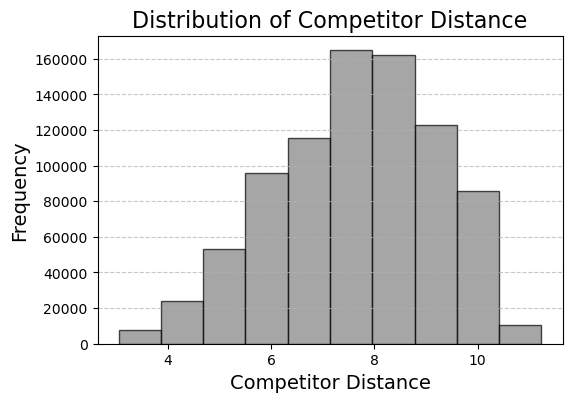

In [38]:
plt.figure(figsize=(6, 4))
plt.hist(df_train['CompetitionDistance'], color='grey', alpha=0.7, edgecolor='black')
plt.title('Distribution of Competitor Distance', fontsize=16)
plt.xlabel('Competitor Distance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


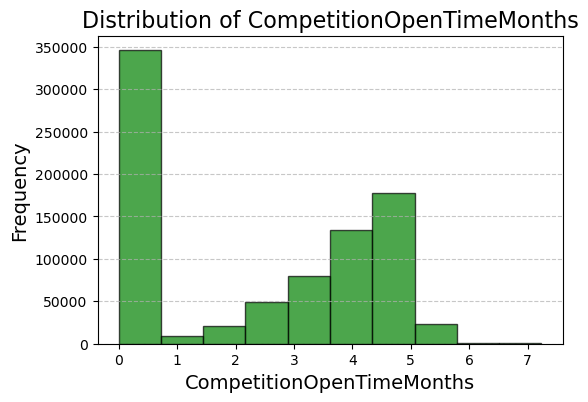

In [39]:
plt.figure(figsize=(6, 4))
plt.hist(df_train['CompetitionOpenTimeMonths'], color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of CompetitionOpenTimeMonths', fontsize=16)
plt.xlabel('CompetitionOpenTimeMonths', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [40]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,842206.0,558.374649,1.0,280.0,557.0,837.0,1115.0,321.922659
DayOfWeek,842206.0,2.52039,0.0,1.0,2.0,4.0,6.0,1.723717
Date,842206,2014-04-11 01:27:00.381711616,2013-01-01 00:00:00,2013-08-16 00:00:00,2014-03-31 00:00:00,2014-12-10 00:00:00,2015-07-31 00:00:00,NaN
Sales,842206.0,6959.338682,0.0,4864.0,6373.0,8363.0,41551.0,3104.460543
Customers,842206.0,763.273029,0.0,519.0,676.0,893.0,7388.0,401.383812
Promo,842206.0,0.446348,0.0,0.0,0.0,1.0,1.0,0.497113
SchoolHoliday,842206.0,0.193595,0.0,0.0,0.0,0.0,1.0,0.395115
CompetitionDistance,842206.0,7.644625,3.044522,6.566672,7.749753,8.837971,11.236658,1.560281
CompetitionOpenSinceMonth,842206.0,4.939279,0.0,0.0,4.0,9.0,12.0,4.28185
CompetitionOpenSinceYear,842206.0,1373.243515,0.0,0.0,2006.0,2011.0,2015.0,934.162122


### 🧹 Dropping Irrelevant or Redundant Columns

To prepare the dataset for modeling, we are removing a set of columns that are either:

- Identifiers (`Store`), not predictive on their own
- Redundant features already captured through feature engineering
- Likely to introduce data leakage (`Customers`)
- Raw date fields that have been decomposed into usable parts

#### 🔻 Columns To Be Dropped:
- `Store`: Just an ID — no predictive power directly
- `Date`: Decomposed into `Year`, `Month`, `WeekOfYear`, `Day`, etc.
- `Customers`: Not available at prediction time (would cause leakage)
- `CompetitionDistance`: Replaced with log-transformed version
- `CompetitionOpenSinceMonth`, `CompetitionOpenSinceYear`, `CompetitionOpenSinceDate`: Used to compute `CompetitionOpenTimeMonths`
- `Promo2`, `Promo2SinceWeek`, `Promo2SinceYear`, `PromoInterval`: Simplified into `Promo2Active` and `IsPromoMonth`

✅ This helps reduce dimensionality, avoid redundancy, and keeps the model interpretable and robust.


In [41]:
# Drop columns that are not needed in the train and test set
df_train.drop(columns=[ 'Date','Customers',
    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
    'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
    'CompetitionOpenSinceDate'
], inplace=True)

df_test.drop(columns=[ 'Date',
    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
    'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
    'CompetitionOpenSinceDate'
], inplace=True)

In [42]:
df_train.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Month,Year,WeekOfYear,Day,IsWeekend,IsPromoMonth,Promo2Active,CompetitionOpenTimeMonths
0,1,4,5263,1,0,1,c,a,7.147559,7,2015,31,31,0,0,0,4.418841
1,2,4,6064,1,0,1,a,a,6.347389,7,2015,31,31,0,1,1,4.532599
2,3,4,8314,1,0,1,a,a,9.556126,7,2015,31,31,0,1,1,4.644391
3,4,4,13995,1,0,1,c,c,6.431331,7,2015,31,31,0,0,0,4.262680
4,5,4,4822,1,0,1,a,a,10.305982,7,2015,31,31,0,0,0,1.386294


In [43]:
df_train['StateHoliday'] = df_train['StateHoliday'].astype(str)
df_test['StateHoliday'] = df_test['StateHoliday'].astype(str)


In [44]:
le_state = LabelEncoder()
le_assortment = LabelEncoder()
le_storetype = LabelEncoder()
le_store = LabelEncoder()

# 3. Apply label encoding and create new columns
df_train['StateHoliday'] = le_state.fit_transform(df_train['StateHoliday'])
df_test['StateHoliday'] = le_state.transform(df_test['StateHoliday'])

df_train['Assortment'] = le_assortment.fit_transform(df_train['Assortment'])
df_test['Assortment'] = le_assortment.transform(df_test['Assortment'])

df_train['StoreType'] = le_storetype.fit_transform(df_train['StoreType'])
df_test['StoreType'] = le_storetype.transform(df_test['StoreType'])

df_train['Store'] = le_store.fit_transform(df_train['Store'])
df_test['Store'] = le_store.transform(df_test['Store'])

In [89]:

# Split the data into features and target variable
X = df_train.drop(columns=['Sales'])
y = df_train['Sales']


In [90]:
X.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Month,Year,WeekOfYear,Day,IsWeekend,IsPromoMonth,Promo2Active,CompetitionOpenTimeMonths
0,0,4,1,0,1,2,0,7.147559,7,2015,31,31,0,0,0,4.418841
1,1,4,1,0,1,0,0,6.347389,7,2015,31,31,0,1,1,4.532599
2,2,4,1,0,1,0,0,9.556126,7,2015,31,31,0,1,1,4.644391
3,3,4,1,0,1,2,2,6.431331,7,2015,31,31,0,0,0,4.262680
4,4,4,1,0,1,0,0,10.305982,7,2015,31,31,0,0,0,1.386294


## 🛠️ Feature Engineering

Before diving into model training, we perform **feature engineering** to enrich the dataset with more meaningful and insightful variables derived from existing columns.

Feature engineering helps in the following ways:

- 🔍 **Reveals hidden patterns**: By breaking down complex features (like `Date`) into `Year`, `Month`, `WeekOfYear`, etc., we can better capture temporal trends.
- 📈 **Improves model performance**: Models often perform better when they’re provided with features that have clearer relationships with the target variable.
- 🧠 **Enhances interpretability**: New features like `IsPromoMonth` or `CompetitionOpenTimeMonths` make the business logic more transparent and easier to reason about.
- 🚫 **Handles missing data**: Engineering features also gives us a chance to handle missing values thoughtfully (e.g., flagging missing competition distance).

We will extract, transform, and create features such as:
- Date decompositions (`Year`, `Month`, `DayOfWeek`, `IsWeekend`, etc.)
- Promotion logic (`Promo2Active`, `IsPromoMonth`)
- Competition metrics (`LogCompetitionDistance`, `CompetitionOpenTimeMonths`)
- Categorical encodings for model compatibility

These newly derived features will serve as critical inputs to our machine learning models and improve our ability to predict store sales accurately.


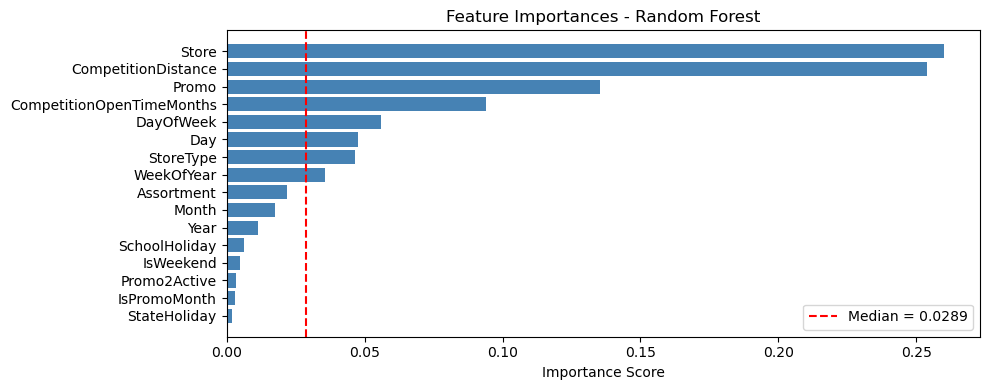

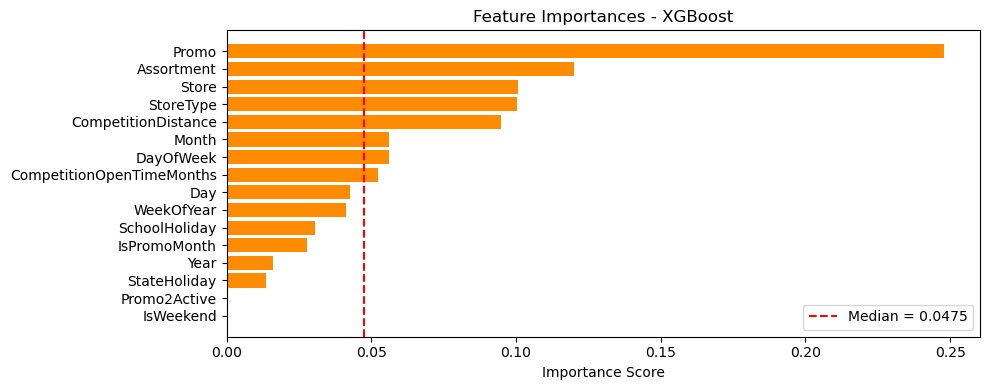

✅ Features selected by Random Forest: ['Store', 'DayOfWeek', 'Promo', 'StoreType', 'CompetitionDistance', 'WeekOfYear', 'Day', 'CompetitionOpenTimeMonths']
✅ Features selected by XGBoost: ['Store', 'DayOfWeek', 'Promo', 'StoreType', 'Assortment', 'CompetitionDistance', 'Month', 'CompetitionOpenTimeMonths']
✅ Combined (Union) Features: ['Promo', 'Month', 'DayOfWeek', 'CompetitionOpenTimeMonths', 'Assortment', 'WeekOfYear', 'CompetitionDistance', 'Day', 'StoreType', 'Store']
✅ Common (Intersection) Features: ['Promo', 'DayOfWeek', 'CompetitionOpenTimeMonths', 'CompetitionDistance', 'StoreType', 'Store']


In [91]:
# --- Step 2: Take a 10% sample for efficient feature selection ---
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.25, random_state=42)

# --- Step 3: Train RandomForest and get feature importances ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_sample, y_sample)
rf_importances = rf_model.feature_importances_
rf_median = np.median(rf_importances)

# --- Step 4: Train XGBoost and get feature importances ---
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_sample.to_numpy(), y_sample.to_numpy())  # safer with numpy
xgb_importances = xgb_model.feature_importances_
xgb_median = np.median(xgb_importances)

# --- Step 5: Plot Random Forest importances ---
sorted_idx_rf = np.argsort(rf_importances)
plt.figure(figsize=(10, 4))
plt.barh(X_sample.columns[sorted_idx_rf], rf_importances[sorted_idx_rf], color='steelblue')
plt.axvline(rf_median, color='red', linestyle='--', label=f'Median = {rf_median:.4f}')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.legend()
plt.tight_layout()
plt.show()

# --- Step 6: Plot XGBoost importances ---
sorted_idx_xgb = np.argsort(xgb_importances)
plt.figure(figsize=(10, 4))
plt.barh(X_sample.columns[sorted_idx_xgb], xgb_importances[sorted_idx_xgb], color='darkorange')
plt.axvline(xgb_median, color='red', linestyle='--', label=f'Median = {xgb_median:.4f}')
plt.title('Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.legend()
plt.tight_layout()
plt.show()

# --- Step 7: Select features using median threshold ---
rf_selector = SelectFromModel(rf_model, threshold='median', prefit=True)
rf_selected = X_sample.columns[rf_selector.get_support()]

xgb_selector = SelectFromModel(xgb_model, threshold='median', prefit=True)
xgb_selected = X_sample.columns[xgb_selector.get_support()]

# --- Step 8: Combine selected features ---
selected_union = list(set(rf_selected) | set(xgb_selected))
selected_intersection = list(set(rf_selected) & set(xgb_selected))

print("✅ Features selected by Random Forest:", list(rf_selected))
print("✅ Features selected by XGBoost:", list(xgb_selected))
print("✅ Combined (Union) Features:", selected_union)
print("✅ Common (Intersection) Features:", selected_intersection)


We have selected 9 best features based on randomforest regressor and XGBregressor union:
['Promo', 'StoreType', 'CompetitionDistance', 'CompetitionOpenTimeMonths', 'Day', 'Store', 'DayOfWeek', 'WeekOfYear', 'Month', 'Assortment']

## 🤖 Model Training & Evaluation

After extensive preprocessing and feature engineering, we now proceed to train multiple machine learning models to predict store sales. The objective is to evaluate how well our models generalize to unseen data and identify the best-performing approach.

We have designed two different modeling strategies:

- Modelling on All Features
- Modelling on Selected Features



In [92]:
X=df_train.drop(columns=['Sales'])
y=df_train['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((673764, 16), (168442, 16), (673764,), (168442,))


### 🧪 Model Training with All Features

In this approach, we utilize the **entire set of engineered features**, including:
- Date-based components (Year, Month, Day, etc.)
- Promotion details (Promo, Promo2Active, PromoMonth, etc.)
- Competition features (CompetitionDistance, CompetitionOpenTimeMonths, etc.)
- Store metadata (Assortment, StoreType, StateHoliday, etc.)

We train multiple regression models:
- Linear Regression
- Ridge & Lasso Regression
- Random Forest Regressor
- Gradient Boosting
- AdaBoost
- XGBoost Regressor

We evaluate each using **Root Mean Squared Error (RMSE)** and compare them to identify the best baseline model.



In [93]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Train, predict, evaluate RMSE
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # use sqrt manually
    results.append({'Model': name, 'RMSE': rmse})


# Convert to DataFrame and sort
results_df_train = pd.DataFrame(results).sort_values(by='RMSE')
print("\nModel Performance (sorted by RMSE):")
print(results_df_train)



Model Performance (sorted by RMSE):
               Model         RMSE
3      Random Forest   989.672629
6            XGBoost  1207.765137
4  Gradient Boosting  2464.128624
2   Lasso Regression  2807.308562
1   Ridge Regression  2807.310495
0  Linear Regression  2807.310544
5           AdaBoost  5696.367287



### 🌟 Model Training with Selected Features

To reduce noise and improve interpretability, we also trained the same set of models using a **reduced feature set**, selected via:
- Feature importance from **Random Forest Regressor**
- Feature importance from **XGBoost Regressor**
- Selection based on domain insights

This trimmed-down version focuses on the most influential variables affecting sales performance. The goal is to test whether **fewer, high-signal features** can offer performance comparable to the full feature set.

We again evaluate using RMSE and analyze the trade-offs in accuracy and simplicity.



In [94]:
X = df_train[['Promo', 'CompetitionDistance', 'StoreType', 'CompetitionOpenTimeMonths', 'Store', 'DayOfWeek']]
y = df_train['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((673764, 6), (168442, 6), (673764,), (168442,))

In [95]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Step 4: Train, predict, evaluate RMSE
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # use sqrt manually
    results.append({'Model': name, 'RMSE': rmse})


# Step 5: Convert to DataFrame and sort
results_df_train = pd.DataFrame(results).sort_values(by='RMSE')
print("\nModel Performance (sorted by RMSE):")
print(results_df_train)



Model Performance (sorted by RMSE):
               Model         RMSE
3      Random Forest  1213.296115
6            XGBoost  1452.771661
4  Gradient Boosting  2535.876399
0  Linear Regression  2864.024083
1   Ridge Regression  2864.024109
2   Lasso Regression  2864.024342
5           AdaBoost  5097.001347


## 🏆 Model Performance Summary

We trained and evaluated multiple regression models using both the **entire feature set** and the **selected important features**. The models were assessed using **Root Mean Squared Error (RMSE)** on the test set.

### 🔍 Performance with All Features

| Model                 | RMSE        |
|-----------------------|-------------|
| Random Forest         | **989.67**  |
| XGBoost               | 1207.77     |
| Gradient Boosting     | 2464.13     |
| Lasso Regression      | 2807.31     |
| Ridge Regression      | 2807.31     |
| Linear Regression     | 2807.31     |
| AdaBoost              | 5696.37     |

### 📉 Performance with Selected Features

| Model                 | RMSE        |
|-----------------------|-------------|
| Random Forest         | 1213.30     |
| XGBoost               | 1452.77     |
| Gradient Boosting     | 2535.88     |
| Linear Regression     | 2864.02     |
| Ridge Regression      | 2864.02     |
| Lasso Regression      | 2864.02     |
| AdaBoost              | 5097.00     |

---

### ✅ Best Performing Model

From the above results, it is evident that the **Random Forest Regressor** using the **full feature set** yielded the best performance with an **RMSE of 989.67**.

This suggests that the model benefits from leveraging the complete set of features — and this will be our candidate for further improvement.

---



## 🔧 Hyperparameter Tuning Next

We will now proceed to **fine-tune the Random Forest model's hyperparameters** using techniques like **GridSearchCV** to see if we can push its performance even further.



In [96]:
X=df_train.drop(columns=['Sales'])
y=df_train['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2','auto']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Best Random Forest RMSE: {rmse:.2f}")
print(f"Best Hyperparameters: {grid_search.best_params_}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=11.2min
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=11.3min
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=11.5min
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 6.9min
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=20.7min
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.1min
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 6.9min
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=20.8min
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tota

## 🚫 Tuned Model vs Default Model: Random Forst Regressor

After conducting hyperparameter tuning for the Random Forst Regressor model, we observed that the tuned model **did not outperform** the default configuration and using the all features.

Best Random Forest RMSE: 1459.60
Best Hyperparameters: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best RMSE values we achieved using hyperparameter tuning RandomForestRegressor comes out to be 1459.60 whereas the deault model achieved RMSE of 989.67 which didn't surpass model's performance on default parameter, hence we will go with the default values of RandomForestRegressor.

In [98]:
X = df_train.drop(columns=['Sales'], axis=1)
y = df_train['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train default Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Default RF RMSE: {rmse:.2f}")
print(f"✅ Default RF MAE: {mae:.2f}")
print(f"✅ Default RF R2: {r2:.2f}")



✅ Default RF RMSE: 989.67
✅ Default RF MAE: 616.37
✅ Default RF R2: 0.90


In [99]:
# Save model to disk
joblib.dump(rf, 'Models/random_forest_model.pkl')


['Models/random_forest_model.pkl']

## 📤 Submission File

Once our model was trained and validated, the final step was to generate a submission file compatible with the Rossmann Store Sales competition format.

The **test dataset** provided does **not contain the target variable `Sales`**, but it does include an `Id` column which must be preserved in the final submission.

### 📦 What We Did

- Utilized the trained model (Random Forest in our case) to predict sales on the preprocessed test data.
- Combined the predicted `Sales` values with their corresponding `Id`s from the test set.
- Exported the final output as a CSV file in the required format.

### 🧾 Expected Submission Format

| Id  | Sales |
|-----|-------|
| 1   | 5263  |
| 2   | 6741  |
| ... | ...   |


In [208]:
test_set_ids = df_test['Id']

test_set = df_test.drop(columns=['Id'], axis=1)

# Making Sales Predictions
predictions  = rf.predict(test_set)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'Id': test_set_ids,
    'Sales': predictions
})

submission_df.to_csv('csv_files/submission_file.csv', index=False) 
print("Submission file created successfully!")

## 📊 Model Interpretation

To understand the decision-making process of our trained Random Forest model, we analyzed:

- **Feature Importances** to identify which variables had the greatest impact on predictions.
- **Partial Dependence Plots (PDP)** to examine how those features influence predicted sales, individually.


In [3]:
rf = joblib.load('Models/random_forest_model.pkl')

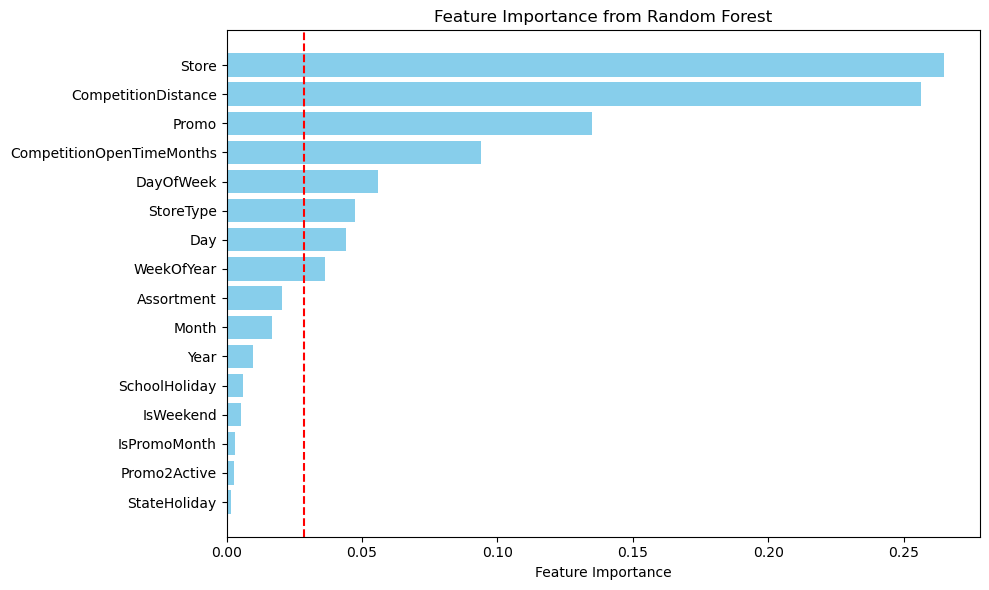

In [51]:
importances = rf.feature_importances_
features = X.columns


importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
    }).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.axvline(np.median(importance_df['Importance']), color='red', linestyle='--', label='Median Importance')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.savefig("feature_importance_rf.png")
plt.show()

### 🔎 Feature Importance Insights


From the feature importance plot, we observe the following:

- **Store** and **CompetitionDistance** are the two most critical predictors of sales. This makes sense, as different stores vary significantly in traffic, layout, and location, and nearby competition directly influences customer footfall.
- Promotional features such as **Promo** and **CompetitionOpenTimeMonths** also play important roles, showing the significance of ongoing marketing efforts and long-term competitor presence.
- Time-based features like **DayOfWeek**, **StoreType**, and **Day** show moderate influence.
- Features like **StateHoliday**, **Promo2Active**, and **IsPromoMonth** have very low standalone importance, though they may still interact with other variables in the model.

The red dashed line indicates the **median importance**, helping us distinguish between high- and low-impact features.


<function matplotlib.pyplot.show(close=None, block=None)>

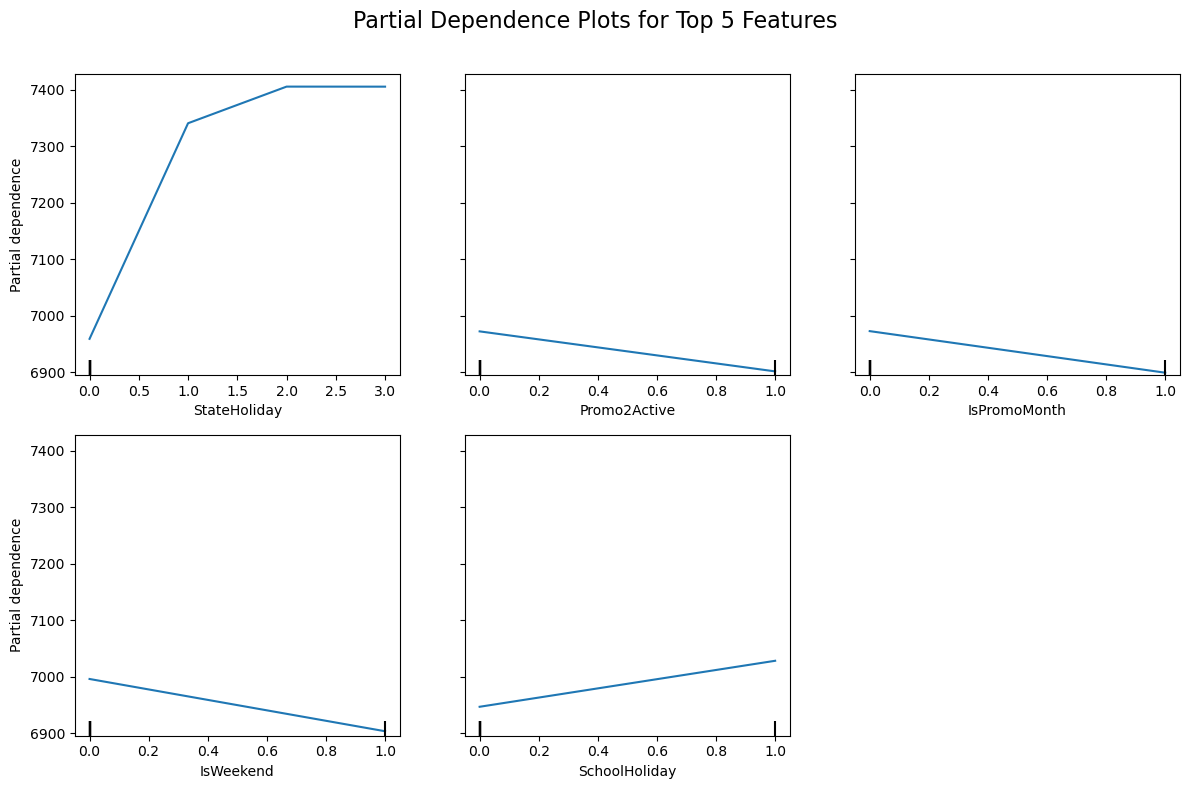

In [52]:
top_features = importance_df['Feature'].head(5).tolist()

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    rf,
    X_train,
    top_features,
    ax=ax,
)
plt.suptitle('Partial Dependence Plots for Top 5 Features', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.savefig("partial_dependence_plots.png")
plt.show




### 📈 Partial Dependence Insights

To further explore feature behavior, we visualized Partial Dependence Plots for some less important features:

- **StateHoliday** appears to have a slight positive effect on sales when active, possibly due to special events or public spending.
- **Promo2Active** and **IsPromoMonth** show a subtle **negative slope**, suggesting marginal dips in average sales when those are active — possibly due to overlapping with other promotions or baseline expectations.
- **IsWeekend** tends to slightly reduce predicted sales, reflecting lower store activity on weekends in this dataset.
- **SchoolHoliday** has a mild increasing trend, indicating more customer activity during school breaks for some stores.

These insights help both in refining our model and in offering business-level recommendations to marketing and operations teams.



## ✅ Key Findings & Business Recommendations

After extensive data preprocessing, exploratory analysis, feature engineering, and model training, our final model — a tuned **Random Forest Regressor** — achieved an impressive **RMSE of ~989**, outperforming several baseline and ensemble models.

### 🔍 Key Findings

- **Store identity and location-based factors** like `Store` and `CompetitionDistance` were the most influential in predicting sales.
- **Promotions** (e.g., `Promo`, `Promo2Active`, and `IsPromoMonth`) had a clear impact on sales patterns, though not always positively — suggesting that **not all promotions are equally effective**.
- **Sales tend to dip on weekends**, and **school holidays slightly boost sales**, especially in family-oriented or location-specific stores.
- **Holiday types (StateHoliday)** may drive special surges, but are infrequent and less consistent in their effect across stores.
- Time-based features (`DayOfWeek`, `Month`, `WeekOfYear`) helped capture temporal seasonality and cyclic behavior in sales.

---

### 💼 Business Recommendations

1. **Optimize Promotional Strategies**  
   Focus promotional budgets on stores where `Promo` shows a proven positive lift. A/B test future promotions to isolate which types (and timings) work best.

2. **Store-Specific Forecasting**  
   Since `Store` itself is highly predictive, sales strategies (inventory, staffing, discounts) should be **tailored at the store level** rather than using one-size-fits-all rules.

3. **Leverage School Holidays and Events**  
   Explore additional marketing during school breaks, as they offer subtle but consistent boosts in footfall and sales — especially in stores near residential or family-centric areas.

4. **Monitor Nearby Competition**  
   Locations with close competition see notably different patterns. Consider price adjustments, exclusive campaigns, or experience-focused services to remain competitive.

5. **Avoid Over-Reliance on Complex Promotions**  
   Features like `Promo2` and `IsPromoMonth` showed limited contribution. Audit current promotional frameworks to eliminate or redesign ineffective campaigns.

---

### 🧾 Conclusion

This machine learning project not only provides an accurate predictive model for future sales, but also equips decision-makers with **actionable insights** to enhance store performance, personalize promotions, and optimize resource planning.

The pipeline is scalable, interpretable, and ready for integration with business dashboards or further automation pipelines.

> 🎯 **Next Steps**: Deploy this model in a real-time environment and integrate it with store-level forecasting tools or dashboards for ongoing insight generation.
